In [ ]:
"""
(Take any Dataset of your choice ,perform EDA(Exploratory Data Analysis) and apply a
suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model.)

Aim - Predicting insurance charges for customers.
Problem type - Regression
Source - Kaggle (Medical Cost Personal Datasets)
Algorithms/Techniques applied - Linear Regression, Random Forest Regressor, 
                                 AdaBoost Regressor, Ordinary Least Square (Statsmodel)
Data input for models - Cross-validation and Train-Test splitting 
"""

In [ ]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns


In [ ]:
# to read the dataset
data = pd.read_csv("/content/insurance.csv")
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
 #View type of data and its statistical information.
 # to find top 5 data from the dataset
 data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# to find last 5 data from the dataset
data.tail

<bound method NDFrame.tail of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
# to find the shape of the dataset
data.shape

(1338, 7)

In [ ]:
# View all column names and statistical description of data
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# to find the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# to describe the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for missing values
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Converting categorical features' string values to int
data.smoker = [1 if x == 'yes' else 0 for x in data.smoker]
data.sex = [1 if x == 'male' else 0 for x in data.sex]


In [ ]:
# Use pandas because multiple values exist for these columns.
data.region = pd.get_dummies(data.region)
data.charges = pd.to_numeric(data.charges)
data.columns.values

Text(0.5, 1.0, 'Distribution of charges values :')

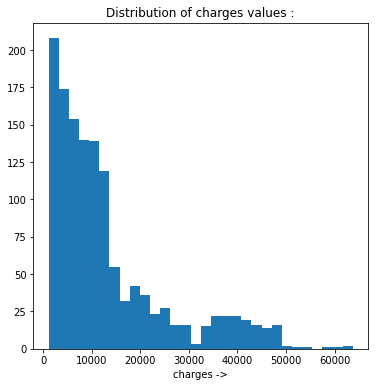

In [ ]:
#-------------------------------------- DATA VISUALIZATION ------------------------------------------------------
# Visualize distribution of values for target variable - 'charges'
plt.figure(figsize=(6,6))
plt.hist(data.charges, bins='auto')
plt.xlabel("charges ->")
plt.title("Distribution of charges values :")

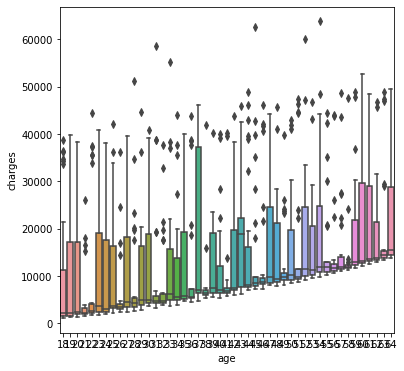

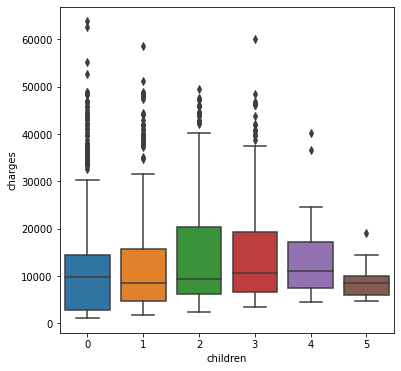

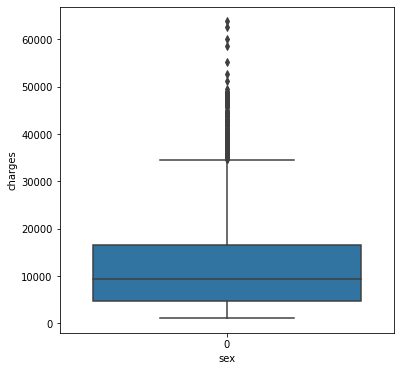

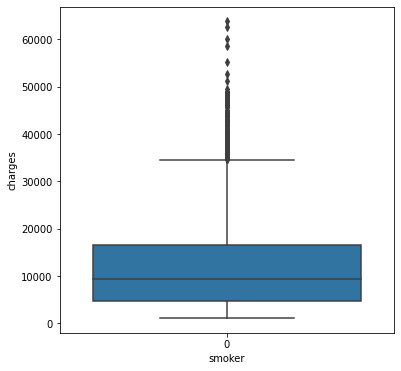

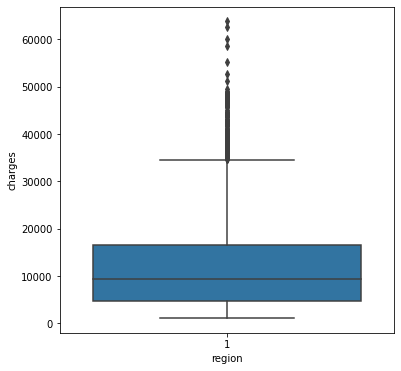

In [ ]:
# Generate Box-plots to check for outliers and relation of each feature with 'charges'
cols = ['age', 'children', 'sex', 'smoker', 'region']
for col in cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(x = data[col], y = data['charges'])

In [ ]:
# Create Correlation matrix for all features of data.
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,NaN,0.109272,0.042469,NaN,NaN,0.299008
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.109272,NaN,1.000000,0.012759,NaN,NaN,0.198341
children,0.042469,NaN,0.012759,1.000000,NaN,NaN,0.067998
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.299008,NaN,0.198341,0.067998,NaN,NaN,1.000000


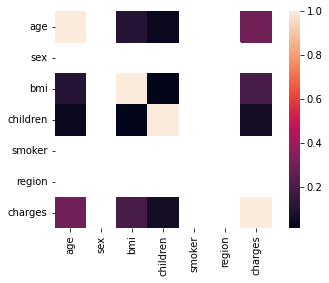

In [ ]:
# Generate heatmap to visualize strong & weak correlations.
sns.heatmap(data.corr(), square = True)

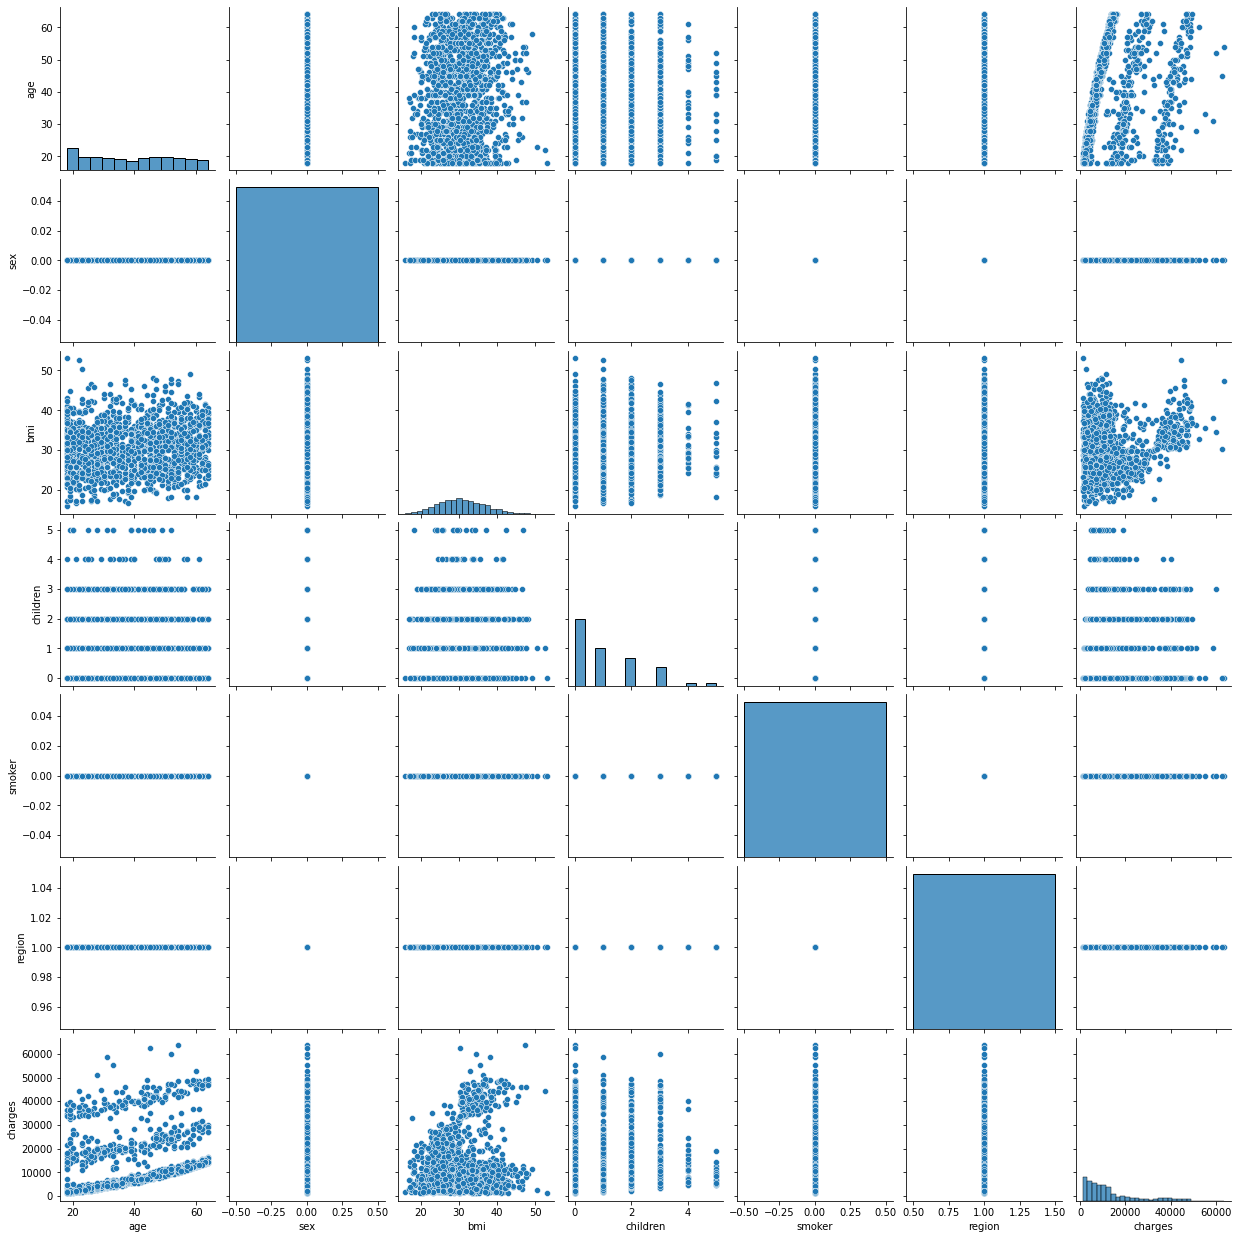

In [ ]:
# Generate predictions using all features by a Linear Regression model.
sns.pairplot(data)

In [ ]:
#---------------------------- Prepare data for predictive regression models --------------------------------------
y = data.charges.values
X = data.drop(['charges'], axis = 1)   # Drop the target

In [ ]:
# --------------------------- PREDICTIVE MODELLING (Call the models to be used) -----------------------------------
rf_reg = RandomForestRegressor(max_features = 'auto', bootstrap = True, random_state = None)
lin_reg = LinearRegression(normalize = True)
ada_reg = AdaBoostRegressor()

Text(0, 0.5, 'Predicted value ->')

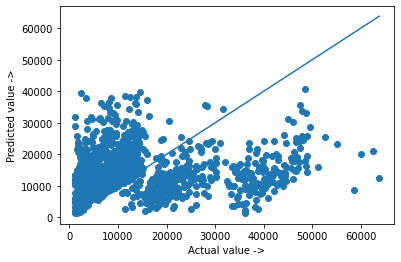

In [ ]:
# --------------------------- 1st Approach - Using Cross-validation (to avoid overfitting) ------------------------
# --------------------------- Plotting Cross-validation Predictions for each model --------------------------------
# Predict using Random Forest Regressor.
predRF = cross_val_predict(rf_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predRF)
ax.plot([y.min(), y.max()], [y.min(), y.max()])
ax.set_xlabel('Actual value ->')
ax.set_ylabel('Predicted value ->')

In [ ]:
# Predict using Linear Regression
predLR = cross_val_predict(lin_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predLR)
ax.plot([y.min(), y.max()], [y.min(), y.max()])
ax.set_xlabel('Actual value ->')
ax.set_ylabel('Predicted value ->')

Text(0, 0.5, 'Predicted value ->')

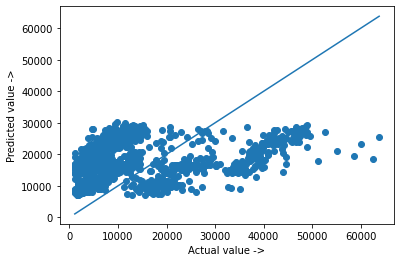

In [ ]:
# Predict using ADABoost Regressor
predADA = cross_val_predict(ada_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predADA)
ax.plot([y.min(), y.max()], [y.min(), y.max()])
ax.set_xlabel('Actual value ->')
ax.set_ylabel('Predicted value ->')


In [ ]:
# ------------------ 2nd Approach - Using Train-test-split ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)


In [ ]:
# Predict using Random Forest Regressor.
rf_reg.fit(X_train, y_train)
predtrainRF = rf_reg.predict(X_train)     # Prediction for train data
predtestRF = rf_reg.predict(X_test)       # Prediction for test data

In [ ]:
# Compute R-squared score for both train and test data.
print("R2-score on train data:", r2_score(y_train,predtrainRF))
print("R2-score on test data:", r2_score(y_test, predtestRF))

R2-score on train data: 0.8421530759713811
R2-score on test data: 0.015220923209714687


In [ ]:
# Predict using Linear Regression
lin_reg.fit(X_train, y_train)
predtrainL = lin_reg.predict(X_train)
predtestL = lin_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainL))
print("R2-score on test data:",r2_score(y_test, predtestL))


In [ ]:
# Predict using XGBoost Regressor
ada_reg.fit(X_train, y_train)
predtrainAda = ada_reg.predict(X_train)
predtestAda = ada_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainAda))
print("R2-score on test data:",r2_score(y_test, predtestAda))

R2-score on train data: 0.0022309708434786746
R2-score on test data: 0.11948408035181801


In [ ]:
# ------------------ Using Ordinary Least Square from Statsmodel --------------------------------
# ----------------- Allows to view full summary statistics along with p-value and F-statistics ----------------
# On Train data.
X_newtrain = sm.add_constant(X_train)
ols_train = sm.OLS(y_train, X_newtrain)
ols_train_new = ols_train.fit()
print(ols_train_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     44.76
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.04e-27
Time:                        05:45:36   Log-Likelihood:                -11481.
No. Observations:                1070   AIC:                         2.297e+04
Df Residuals:                    1066   BIC:                         2.299e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          225.3251     24.180      9.319      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# On Test data.
X_newtest = sm.add_constant(X_test)
ols_test = sm.OLS(y_test, X_newtest)
ols_test_new = ols_test.fit()
print(ols_test_new.summary())   

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     15.95
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.46e-09
Time:                        05:46:40   Log-Likelihood:                -2905.9
No. Observations:                 268   AIC:                             5820.
Df Residuals:                     264   BIC:                             5834.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          295.2113     56.232      5.250      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
  # Produce full statistical summary
plt.show()
# Note- [data.region = pd.get_dummies(data.region)] this part of code take two colunnms intead of taking one column
# that's why sometime occure error but this method is also correct